In [19]:
from sklearn import svm
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [20]:
citrus = pd.read_csv("citrus.csv")
citrus

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [21]:
citrus = citrus.sample(frac=1).reset_index()
citrus = citrus.drop(columns="index")
citrus

,name,diameter,weight,red,green,blue
0,orange,6.47,122.85,145,73,2
1,orange,8.89,158.92,156,95,2
2,orange,8.82,157.75,166,62,9
3,orange,6.14,118.27,151,81,2
4,grapefruit,11.00,190.20,158,74,18
...,...,...,...,...,...,...
9995,grapefruit,12.21,208.45,144,79,14
9996,grapefruit,10.47,181.41,142,63,6
9997,grapefruit,11.78,202.69,156,69,16
9998,grapefruit,11.15,192.55,147,79,20


In [25]:
scaler = StandardScaler()
scaler.fit(citrus.drop("name", axis=1))

x = pd.DataFrame(scaler.transform(citrus.drop("name", axis=1)), columns=citrus.columns[1:])
y = citrus[["name"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
classifier = svm.SVC(kernel="linear") #linear', 'poly', 'sigmoid', 'rbf' (radial basis function)
classifier.fit(x_train, y_train)
y_hat = classifier.predict(x_test)

Accuracy: 0.9516666666666667


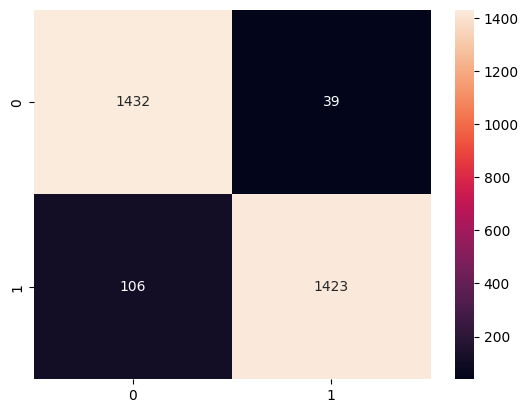

In [27]:
print("Accuracy:", accuracy_score(y_test, y_hat) )

sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt="d")
plt.show()

![image](Gauss.png)

![image](Kernels.png)